> # **Medical cost insurance predictor**# 
> Used for predicting your medical cost based on your age, bmi, sex, no. of children, region and smoking issues.

In [491]:
import numpy as np # linear algebra
import pandas as pd 
import torch

In [492]:
!pip install jovian --upgrade --quiet

In [493]:
import jovian

In [494]:
jovian.commit(project='medical-cost-predictor-linear-regression', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/sathi-satb/medical-cost-predictor-linear-regression


<IPython.core.display.Javascript object>

# **Fetching the data**

In [495]:
data = pd.read_csv('../input/insurance/insurance.csv')

In [496]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We need to replace 'string' values to number as later, it will not be supported for our work!

In [497]:
data['sex'] = data['sex'].apply({'male':0,'female':1}.get)
data['smoker'] = data['smoker'].apply({'yes':1,'no':0}.get)
data['region'] = data['region'].apply({'southwest':0,'southeast':1,'northwest':2,'northeast':2}.get)

In [498]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


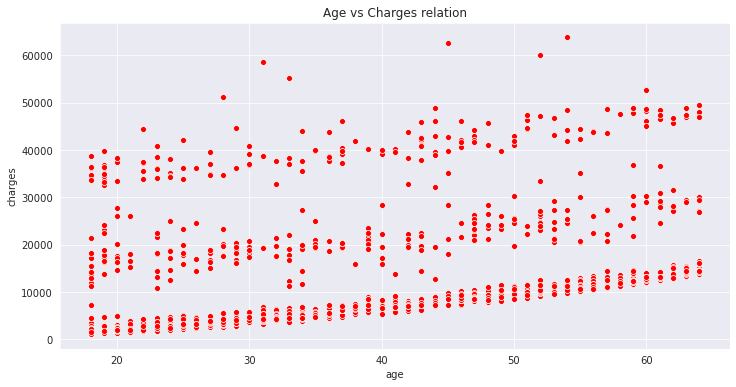

In [499]:
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.title('Age vs Charges relation')
sns.scatterplot(x=data['age'],y=data['charges'], color = 'red');

Above we have have simply plotted a scatterplot between 'age' and 'charges', to represnt their relation and we can see with age, the insurance charges has also increased, which is quite obvious.

Now we declare our 'input' and 'targets'!

In [500]:
inputs = data[['age', 'sex', 'bmi', 'children','smoker','region']]
targets = data[['charges']]

Now, changing it to numpy array!

In [501]:
inputs = np.array(inputs,dtype ='float32')
targets = np.array(targets,dtype = 'float32')

Now, to tensor and to begin our real work!

In [502]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[19.0000,  1.0000, 27.9000,  0.0000,  1.0000,  0.0000],
        [18.0000,  0.0000, 33.7700,  1.0000,  0.0000,  1.0000],
        [28.0000,  0.0000, 33.0000,  3.0000,  0.0000,  1.0000],
        ...,
        [18.0000,  1.0000, 36.8500,  0.0000,  0.0000,  1.0000],
        [21.0000,  1.0000, 25.8000,  0.0000,  0.0000,  0.0000],
        [61.0000,  1.0000, 29.0700,  0.0000,  1.0000,  2.0000]])
tensor([[16884.9238],
        [ 1725.5522],
        [ 4449.4619],
        ...,
        [ 1629.8335],
        [ 2007.9449],
        [29141.3594]])


In [503]:
jovian.commit(project='medical-cost-predictor-linear-regression', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/sathi-satb/medical-cost-predictor-linear-regression


<IPython.core.display.Javascript object>

# **Initializing weights and biases**

In [504]:
#Weight and biases
w = torch.randn(1,6,requires_grad = True)
b = torch.randn(1,requires_grad = True)
print(w)
print(b)

tensor([[-0.1835, -0.4392,  0.5632, -0.1347,  0.4573, -0.4406]],
       requires_grad=True)
tensor([-0.3408], requires_grad=True)


In [505]:
def model(z):
    return z@w.t()+b

Above, we defined our model!


Now, it is time for prediction!

In [506]:
#Predictions
preds = model(inputs)
print(preds)

tensor([[11.9048],
        [14.8012],
        [12.2627],
        ...,
        [16.2316],
        [ 9.8976],
        [ 3.9742]], grad_fn=<AddBackward0>)


In [507]:
print(targets)

tensor([[16884.9238],
        [ 1725.5522],
        [ 4449.4619],
        ...,
        [ 1629.8335],
        [ 2007.9449],
        [29141.3594]])


In [508]:
jovian.commit(project='medical-cost-predictor-linear-regression', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/sathi-satb/medical-cost-predictor-linear-regression


<IPython.core.display.Javascript object>

# **Loss Function**

We now calculate MSE(Mean Squared Error)

In [509]:
def mse(t1,t2):
    diff = (t1-t2) 
    return torch.sum(diff*diff)/diff.numel()

In [510]:
loss = mse(preds,targets)
print(loss)

tensor(3.2241e+08, grad_fn=<DivBackward0>)


# **Gradient**

loss.backward() for gradient computation

In [511]:
loss.backward()

Now, finding derivative of loss with respect to each element!

In [512]:
print(w)
print(w.grad)

tensor([[-0.1835, -0.4392,  0.5632, -0.1347,  0.4573, -0.4406]],
       requires_grad=True)
tensor([[-1141624.2500,   -12429.6816,  -842519.1875,   -31024.9102,
           -13122.8271,   -33047.1484]])


In [513]:
loss = mse(preds,targets)
print(loss)

tensor(3.2241e+08, grad_fn=<DivBackward0>)


Our prediction here is pretty bad, let's train our model!

In [514]:
for i in range(50000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-4
        b -= b.grad * 1e-4
        w.grad.zero_()
        b.grad.zero_()

In [515]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(42896596., grad_fn=<DivBackward0>)


**The loss function has reduced than before!**

In [516]:
for i in range(500000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-4
        b -= b.grad * 1e-4
        w.grad.zero_()
        b.grad.zero_()

In [517]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(36574580., grad_fn=<DivBackward0>)


In [518]:
for i in range(20000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-4
        b -= b.grad * 1e-4
        w.grad.zero_()
        b.grad.zero_()

In [519]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(36571320., grad_fn=<DivBackward0>)


In [520]:
for i in range(200000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-4
        b -= b.grad * 1e-4
        w.grad.zero_()
        b.grad.zero_()

In [521]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(36558068., grad_fn=<DivBackward0>)


In [522]:
for i in range(400000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-4
        b -= b.grad * 1e-4
        w.grad.zero_()
        b.grad.zero_()

In [523]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(36556276., grad_fn=<DivBackward0>)


Let's run it one more time!

In [528]:
for i in range(5000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-4
        b -= b.grad * 1e-4
        w.grad.zero_()
        b.grad.zero_()

In [529]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(36556276., grad_fn=<DivBackward0>)


We get the same value, indicating we may have reached the significant prediction close to our target variables.

In [530]:
preds

tensor([[25104.5312],
        [ 3763.2803],
        [ 7031.7646],
        ...,
        [ 4421.4268],
        [ 1141.3789],
        [37128.0156]], grad_fn=<AddBackward0>)

In [531]:
targets

tensor([[16884.9238],
        [ 1725.5522],
        [ 4449.4619],
        ...,
        [ 1629.8335],
        [ 2007.9449],
        [29141.3594]])

Much closer to the target variables now!

In [532]:
jovian.commit(project='medical-cost-predictor-linear-regression', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/sathi-satb/medical-cost-predictor-linear-regression


<IPython.core.display.Javascript object>

# **Final Overview**

In [533]:
preds = preds.detach().numpy()
targets = targets.detach().numpy()


We need to convert your tensor to another tensor that isn't requiring a gradient in addition to its actual value definition else we get RunTime error as "Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead."

In [534]:
preds[0:5]

array([[25104.531 ],
       [ 3763.2803],
       [ 7031.7646],
       [ 3930.835 ],
       [ 5701.9814]], dtype=float32)

**Now let's predict medical insurance charges for a new person with whole new data!**

In [535]:
# Predict charges for new customer : Name- Frank
other_input = { 'age': 65,
                'sex': 1,
                'bmi': 40,
                'children': 2,
                'smoker': 0,
                'region' : 2
              }
index = [0]
other_df = pd.DataFrame(other_input,index)
other_df

,age,sex,bmi,children,smoker,region
0,65,1,40,2,0,2


In [536]:
input1 = other_df

In [537]:
input1 = np.array(input1,dtype ='float32')

In [538]:
input1 = torch.from_numpy(input1)

In [540]:
prediction_frank = model(input1)
print("The predicted insurance:",prediction_frank)

The predicted insurance: tensor([[18909.6602]], grad_fn=<AddBackward0>)


>  **So by the person's given input, we have predicted the person's predicted Medical insurance cost is around $18909.66 **

In [541]:
jovian.commit(project='medical-cost-predictor-linear-regression', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/sathi-satb/medical-cost-predictor-linear-regression


<IPython.core.display.Javascript object>